# Content from Deliverable_1.ipynb

In [1]:
# MSCS 634 - Project Deliverable 1
# Advanced Data Mining for Data-Driven Insights and Predictive Modeling
# Dataset: Stroke Prediction Dataset (Kaggle)

# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set display and style options
pd.set_option('display.max_columns', None)
sns.set(style='whitegrid')

# Load Dataset
df = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')



In [2]:
# Inspect structure
print("Dataset shape:", df.shape)
df.head()

# Basic Info
df.info()
df.describe(include='all')

# Check missing values
print("\nMissing values per column:\n", df.isnull().sum())

# Data Cleaning
# Drop 'id' column (not useful for modeling)
df.drop(columns=['id'], inplace=True)

# Handle missing values in 'bmi' (replace with median)
df['bmi'].fillna(df['bmi'].median(), inplace=True)



Dataset shape: (5110, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB

Missing values per column:
 id                     0
gender                 0
age                    0
hypertension           0
he

/tmp/ipython-input-2214330086.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].median(), inplace=True)


In [3]:
# Check for duplicates
duplicates = df.duplicated().sum()
print("Duplicate records:", duplicates)
df.drop_duplicates(inplace=True)

# Fix categorical inconsistencies (e.g., work_type typo)
df['work_type'].replace({'Govt_jov': 'Govt_job'}, inplace=True)

# Confirm cleaning
df.info()



Duplicate records: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


/tmp/ipython-input-1039141086.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['work_type'].replace({'Govt_jov': 'Govt_job'}, inplace=True)


/tmp/ipython-input-1133343763.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='stroke', data=df, palette='pastel')


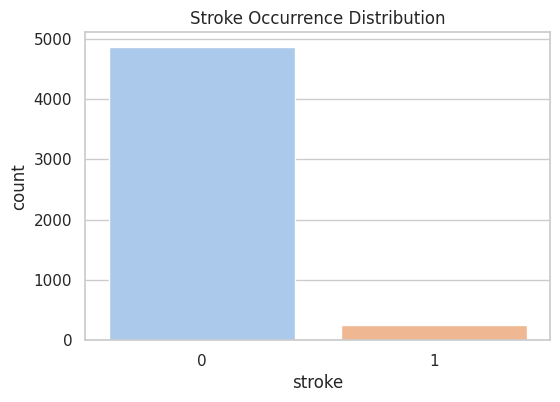

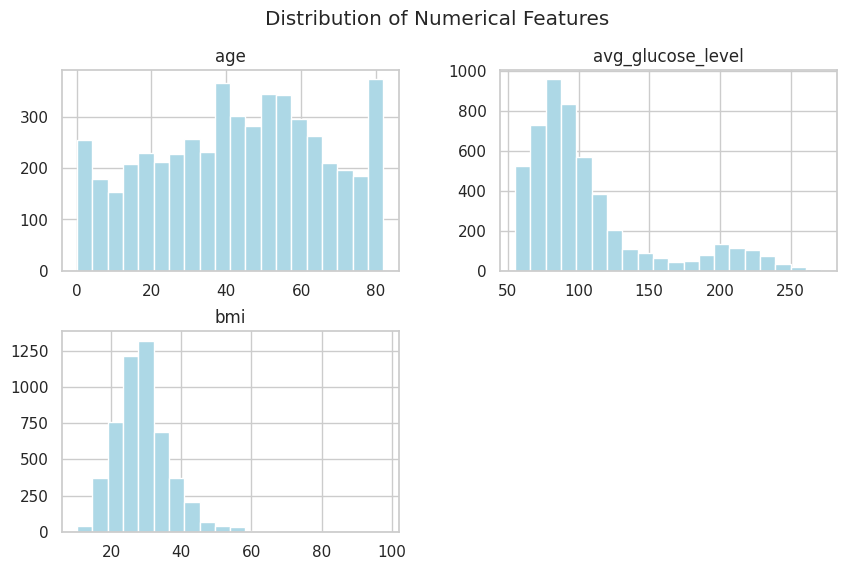

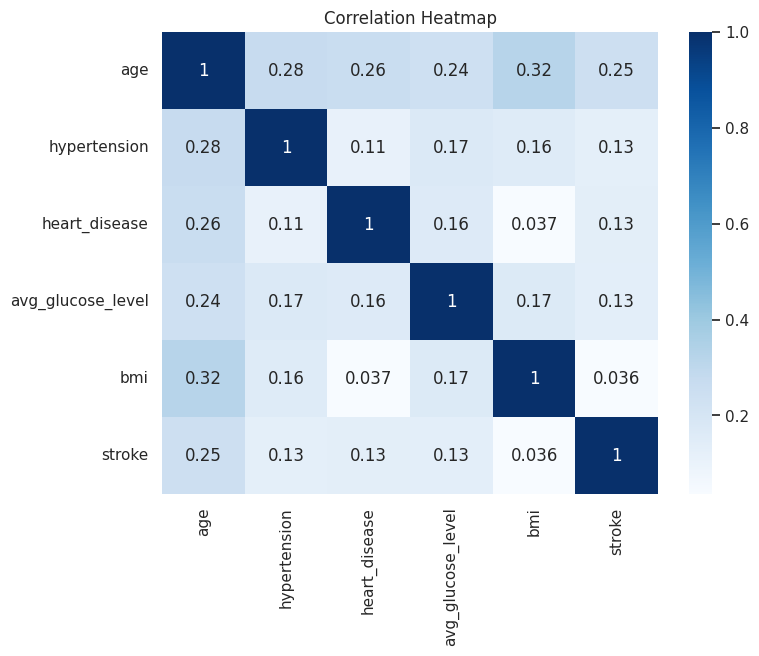

/tmp/ipython-input-1133343763.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='stroke', y='age', data=df, palette='coolwarm')


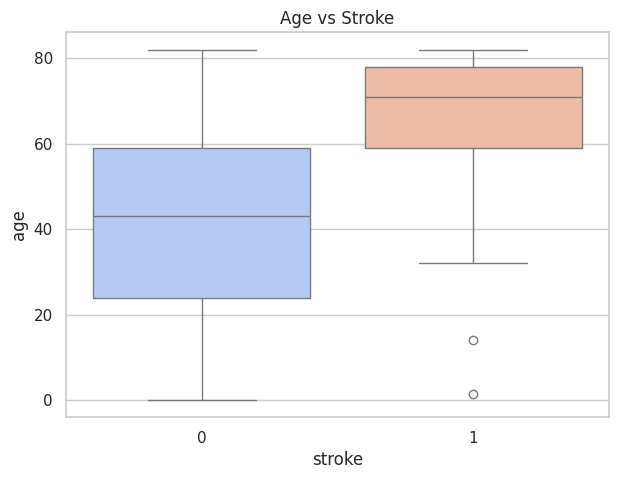

/tmp/ipython-input-1133343763.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='stroke', y='bmi', data=df, palette='coolwarm')


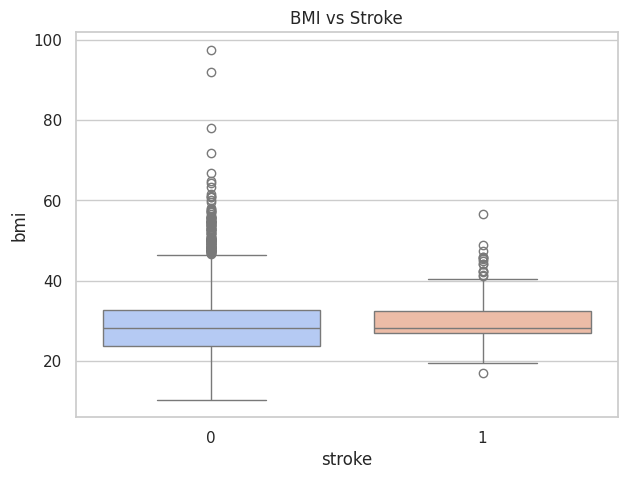

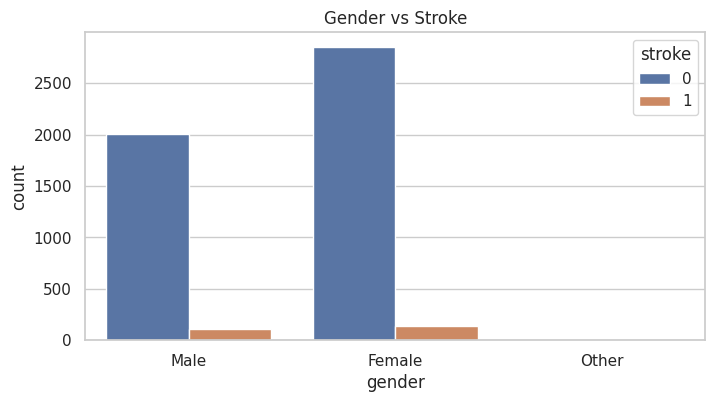

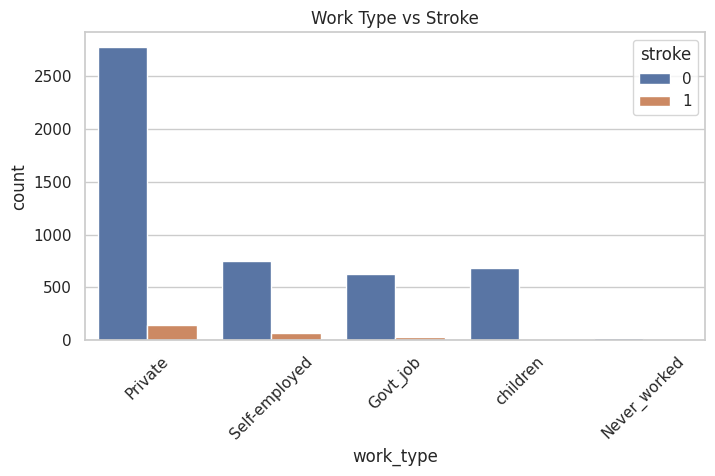

In [4]:
# Exploratory Data Analysis (EDA)
#  Distribution of Target Variable
plt.figure(figsize=(6,4))
sns.countplot(x='stroke', data=df, palette='pastel')
plt.title('Stroke Occurrence Distribution')
plt.show()

#  Numeric Distributions
num_cols = ['age', 'avg_glucose_level', 'bmi']
df[num_cols].hist(bins=20, figsize=(10,6), color='lightblue')
plt.suptitle('Distribution of Numerical Features')
plt.show()

#  Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

#  Relationship between Age, BMI, and Stroke
plt.figure(figsize=(7,5))
sns.boxplot(x='stroke', y='age', data=df, palette='coolwarm')
plt.title('Age vs Stroke')
plt.show()

plt.figure(figsize=(7,5))
sns.boxplot(x='stroke', y='bmi', data=df, palette='coolwarm')
plt.title('BMI vs Stroke')
plt.show()

#  Categorical Breakdown
plt.figure(figsize=(8,4))
sns.countplot(x='gender', hue='stroke', data=df)
plt.title('Gender vs Stroke')
plt.show()

plt.figure(figsize=(8,4))
sns.countplot(x='work_type', hue='stroke', data=df)
plt.title('Work Type vs Stroke')
plt.xticks(rotation=45)
plt.show()

# Deliverable 2 content

                     R2_CV    RMSE_CV
LinearRegression  0.338800  62.504792
Ridge             0.382059  60.465540
Lasso             0.445447  57.133522
                   R2_Test  RMSE_Test
LinearRegression  0.415640  55.641965
Ridge             0.455779  53.696955
Lasso             0.516080  50.634784


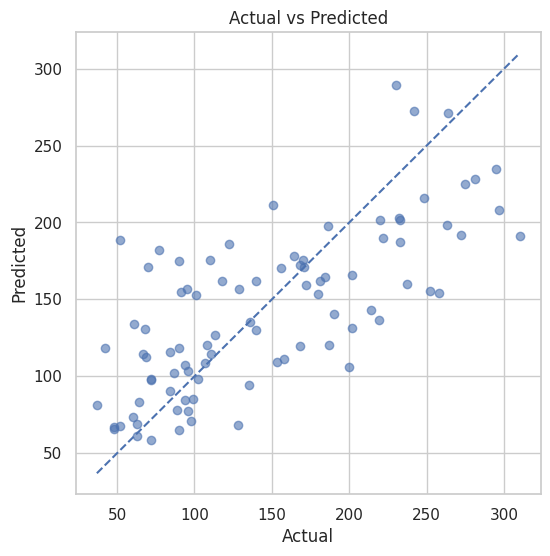

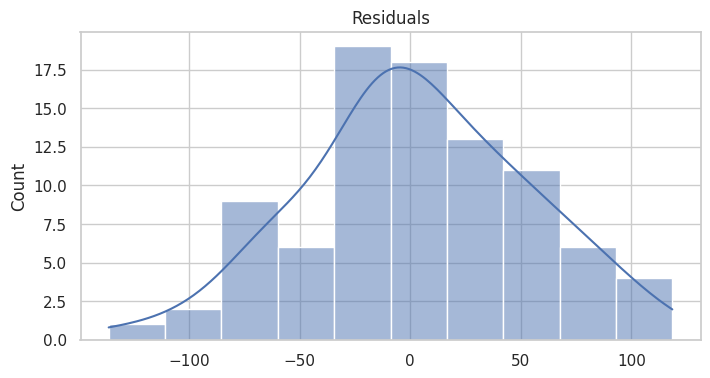

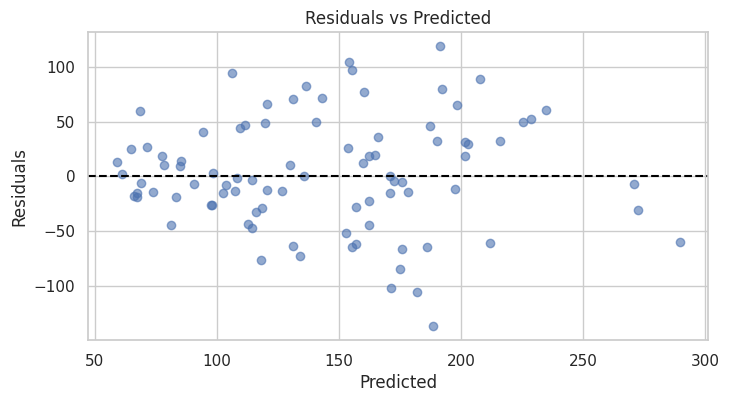

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error

data = load_diabetes()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

numeric_features = X.columns.tolist()

preprocessor = Pipeline([
    ("poly", PolynomialFeatures(degree=2, include_bias=False)),
    ("scaler", StandardScaler())
])

models = {
    "LinearRegression": Pipeline([("prep", preprocessor), ("reg", LinearRegression())]),
    "Ridge": Pipeline([("prep", preprocessor), ("reg", Ridge())]),
    "Lasso": Pipeline([("prep", preprocessor), ("reg", Lasso(max_iter=10000))])
}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

cv = KFold(n_splits=5, shuffle=True, random_state=42)
results = {}

for name, model in models.items():
    cv_res = cross_validate(model, X_train, y_train, scoring=["r2","neg_mean_squared_error"], cv=cv)
    mse = -cv_res["test_neg_mean_squared_error"]
    rmse = np.sqrt(mse)
    results[name] = {
        "R2_CV": cv_res["test_r2"].mean(),
        "RMSE_CV": rmse.mean()
    }

print(pd.DataFrame(results).T)

test_results = {}
trained_models = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    trained_models[name] = model
    pred = model.predict(X_test)
    test_results[name] = {
        "R2_Test": r2_score(y_test, pred),
        "RMSE_Test": np.sqrt(mean_squared_error(y_test, pred))
    }

test_df = pd.DataFrame(test_results).T
print(test_df)

best_model_name = test_df["R2_Test"].idxmax()
best_model = trained_models[best_model_name]

pred = best_model.predict(X_test)

plt.figure(figsize=(6,6))
plt.scatter(y_test, pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "--")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

residuals = y_test - pred
plt.figure(figsize=(8,4))
sns.histplot(residuals, kde=True)
plt.title("Residuals")
plt.show()

plt.figure(figsize=(8,4))
plt.scatter(pred, residuals, alpha=0.6)
plt.axhline(0, linestyle="--", color="black")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()


# Deliverable 3 content

In [6]:
import warnings, sys, os

# Hide Python warnings
warnings.filterwarnings("ignore")

# Hide ALL stderr warnings from libraries like jupyter_client
sys.stderr = open(os.devnull, "w")
import logging
logging.disable(logging.CRITICAL)


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc,
    accuracy_score, f1_score, classification_report
)
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN

# For association rules
from mlxtend.frequent_patterns import apriori, association_rules

# reproducibility
RANDOM_STATE = 42

print('libraries imported')


libraries imported


(569, 31)
target
1    357
0    212
Name: count, dtype: int64


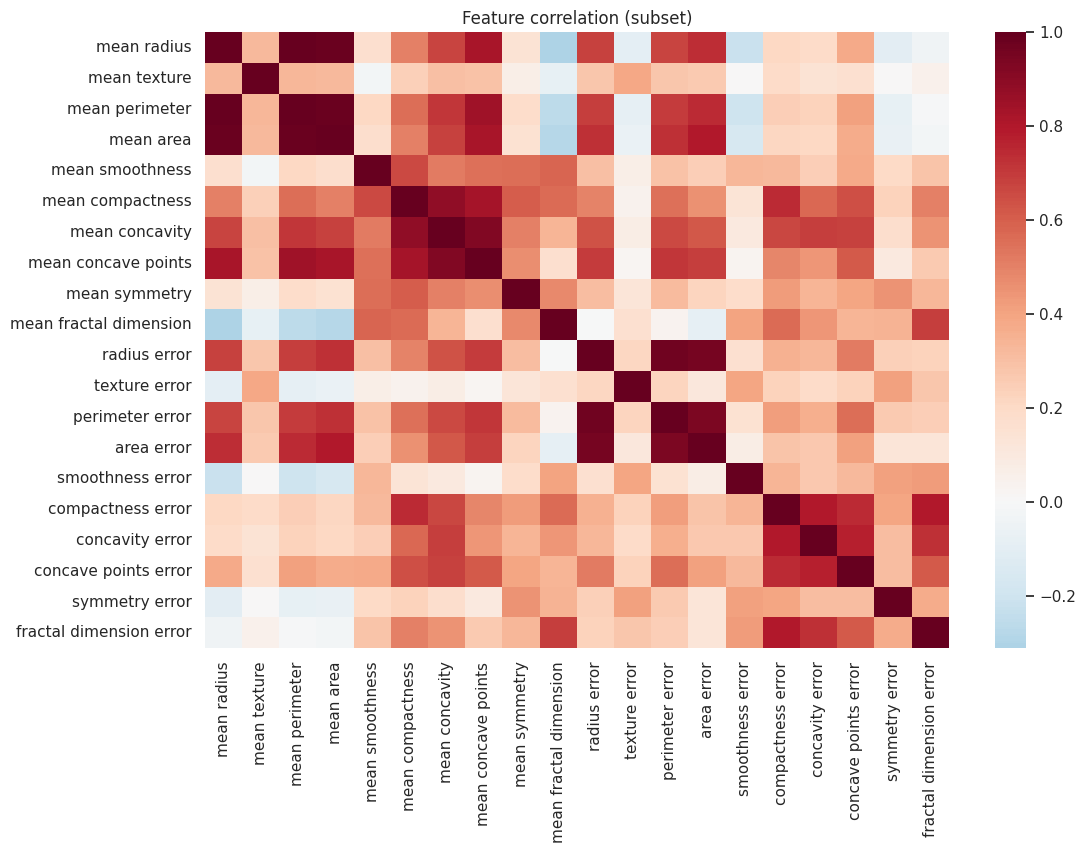

In [8]:
#Load dataset & exploratory data analysis
data = load_breast_cancer(as_frame=True)
df = data.frame.copy()

df['target'] = data.target

df.head()
# Cell: quick EDA
print(df.shape)
print(df['target'].value_counts())
df.describe().T.head()
# Cell: correlation heatmap (top 20 features by variance)
plt.figure(figsize=(12,8))
cols = df.columns[:-1]  # exclude target
corr = df[cols].corr()
# plot only a subset for readability
sns.heatmap(corr.iloc[:20,:20], cmap='RdBu_r', center=0)
plt.title('Feature correlation (subset)')
plt.show()


In [9]:
# Preprocessing
X = df.drop(columns=['target'])
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print('train/test shapes:', X_train.shape, X_test.shape)


train/test shapes: (455, 30) (114, 30)


Decision Tree - Accuracy: 0.9122807017543859 F1: 0.9285714285714286


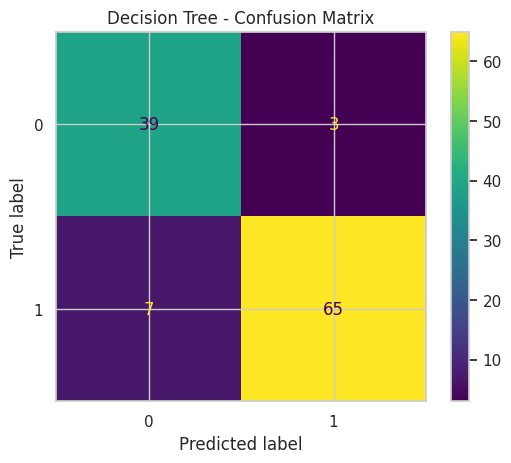

k-NN - Accuracy: 0.956140350877193 F1: 0.9655172413793104


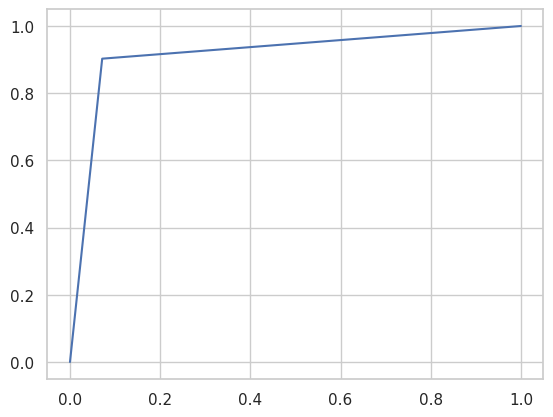

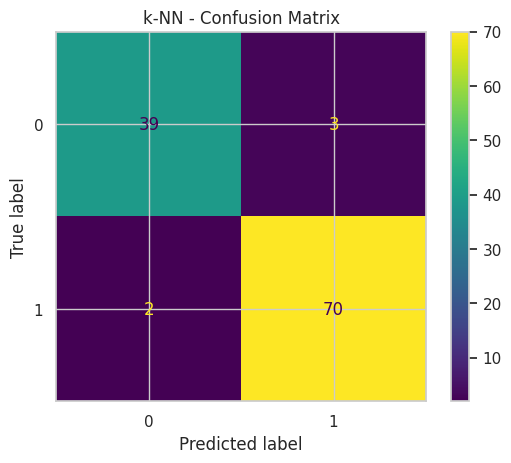

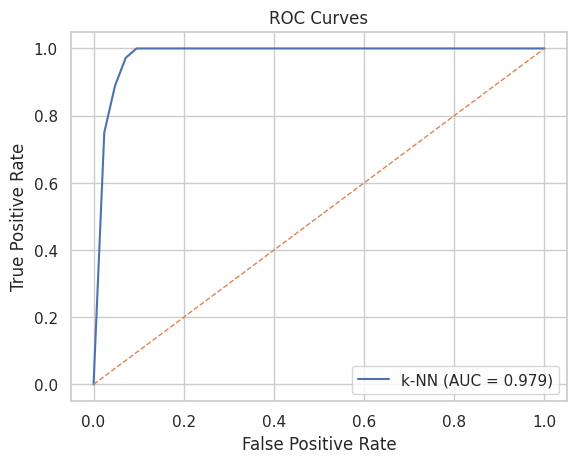

In [10]:
# train decision tree
dt = DecisionTreeClassifier(random_state=RANDOM_STATE)
dt.fit(X_train_scaled, y_train)

y_pred_dt = dt.predict(X_test_scaled)

# metrics
acc_dt = accuracy_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
print('Decision Tree - Accuracy:', acc_dt, 'F1:', f1_dt)

# display confusion matrix
ConfusionMatrixDisplay.from_estimator(dt, X_test_scaled, y_test)
plt.title('Decision Tree - Confusion Matrix')
plt.show()

# ROC curve
y_proba_dt = dt.predict_proba(X_test_scaled)[:,1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_proba_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)
plt.plot(fpr_dt, tpr_dt, label=f'DT (AUC = {roc_auc_dt:.3f})')

# Cell: k-NN
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
acc_knn = accuracy_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
print('k-NN - Accuracy:', acc_knn, 'F1:', f1_knn)

ConfusionMatrixDisplay.from_estimator(knn, X_test_scaled, y_test)
plt.title('k-NN - Confusion Matrix')
plt.show()

# ROC for k-NN
y_proba_knn = knn.predict_proba(X_test_scaled)[:,1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_proba_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)
plt.plot(fpr_knn, tpr_knn, label=f'k-NN (AUC = {roc_auc_knn:.3f})')

# finish ROC plot
plt.plot([0,1],[0,1],'--',linewidth=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()


Starting hyperparameter tuning...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best params: {'n_estimators': 100, 'max_features': 'log2', 'max_depth': 10}
Best CV F1: 0.9648442513057132
Tuned RF - Test Accuracy: 0.956140350877193
Tuned RF - Test F1: 0.9655172413793104


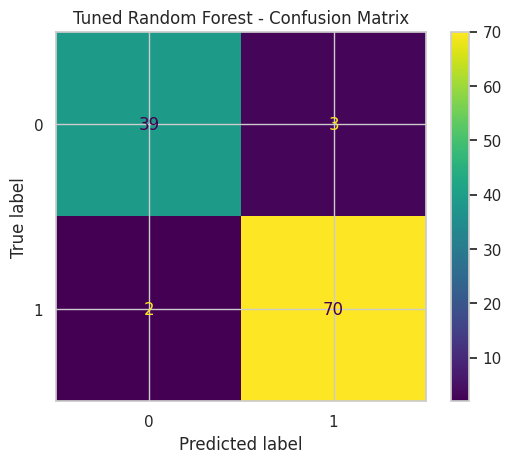

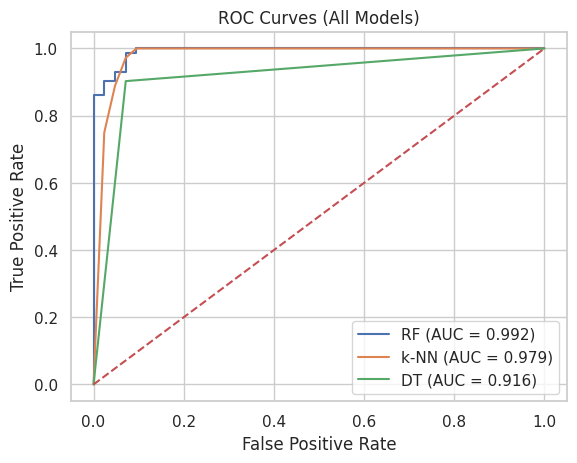

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10, 20],
    'max_features': ['sqrt', 'log2'],
}

rf = RandomForestClassifier(random_state=RANDOM_STATE)

rs = RandomizedSearchCV(
    rf,
    param_distributions=param_dist,
    n_iter=10,
    scoring='f1',
    cv=5,
    random_state=42,
    n_jobs=-1,
    verbose=3
)

print("Starting hyperparameter tuning...")
rs.fit(X_train_scaled, y_train)

print("Best params:", rs.best_params_)
print("Best CV F1:", rs.best_score_)

best_rf = rs.best_estimator_

# Evaluate
y_pred_rf = best_rf.predict(X_test_scaled)
acc_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print("Tuned RF - Test Accuracy:", acc_rf)
print("Tuned RF - Test F1:", f1_rf)

# Confusion matrix
ConfusionMatrixDisplay.from_estimator(best_rf, X_test_scaled, y_test)
plt.title("Tuned Random Forest - Confusion Matrix")
plt.show()

# ROC curve
y_proba_rf = best_rf.predict_proba(X_test_scaled)[:,1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.plot(fpr_rf, tpr_rf, label=f'RF (AUC = {roc_auc_rf:.3f})')
plt.plot(fpr_knn, tpr_knn, label=f'k-NN (AUC = {roc_auc_knn:.3f})')
plt.plot(fpr_dt, tpr_dt, label=f'DT (AUC = {roc_auc_dt:.3f})')
plt.plot([0,1], [0,1], '--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves (All Models)")
plt.legend()
plt.show()


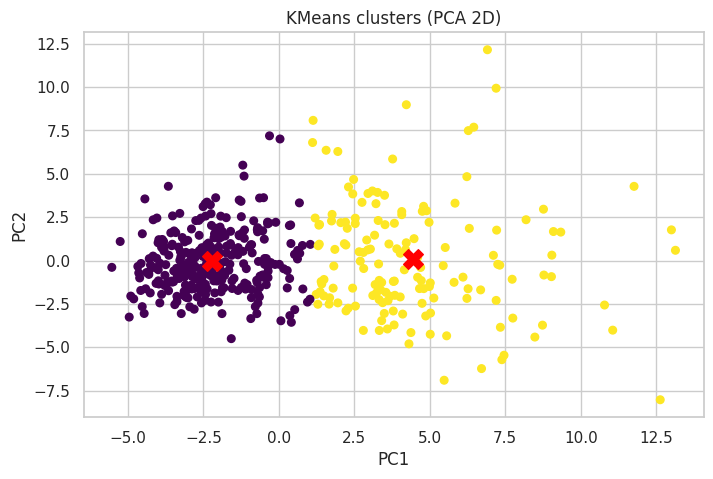

KMeans cluster composition (train set):
       benign(0)  malignant(1)
row_0                         
0             32           272
1            138            13


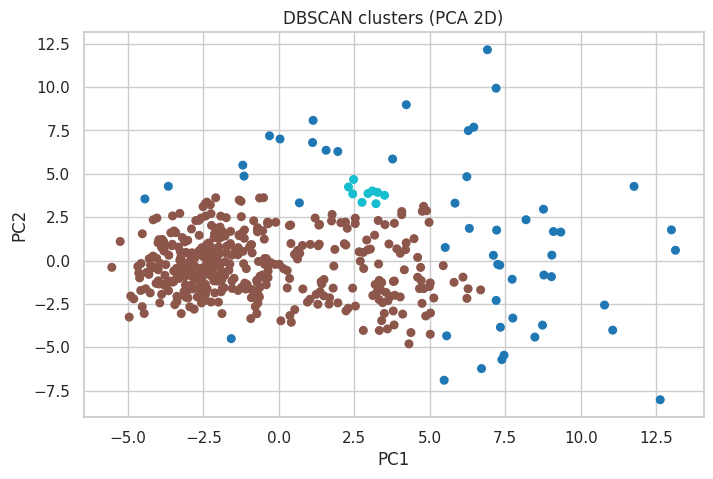

DBSCAN unique labels (including -1 for noise): [-1  0  1]
DBSCAN cluster composition (train set):
       benign(0)  malignant(1)
row_0                         
-1            36            14
 0           128           268
 1             6             3


In [12]:
#PCA to 2D for visualization
pca = PCA(n_components=2, random_state=RANDOM_STATE)
X_pca = pca.fit_transform(X_train_scaled)

# KMeans
kmeans = KMeans(n_clusters=2, random_state=RANDOM_STATE)
kmeans_labels = kmeans.fit_predict(X_pca)

plt.figure(figsize=(8,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=kmeans_labels, cmap='viridis', s=30)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            marker='X', s=200, c='red')
plt.title('KMeans clusters (PCA 2D)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# cluster composition
comp = pd.crosstab(index=kmeans_labels, columns=y_train)
comp.columns = ['benign(0)','malignant(1)']
print('KMeans cluster composition (train set):')
print(comp)

# DBSCAN
db = DBSCAN(eps=0.9, min_samples=5)
db_labels = db.fit_predict(X_pca)

plt.figure(figsize=(8,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=db_labels, cmap='tab10', s=30)
plt.title('DBSCAN clusters (PCA 2D)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

print('DBSCAN unique labels (including -1 for noise):', np.unique(db_labels))

# analyze DBSCAN cluster vs true labels
comp_db = pd.crosstab(index=db_labels, columns=y_train)
comp_db.columns = ['benign(0)','malignant(1)']
print('DBSCAN cluster composition (train set):')
print(comp_db)


In [13]:
#discretize features for association rules
X_full = pd.concat([X, y], axis=1)
# choose a subset of features to keep runtime low
selected_features = ['mean radius','mean texture','mean perimeter','mean area','mean smoothness']

binned = X_full[selected_features].apply(lambda col: pd.cut(col, bins=3, labels=['low','med','high']))
# prefix column names
binned.columns = [f'{c}_bin' for c in binned.columns]

# make one-hot
ohe = pd.get_dummies(binned)
# append target as a categorical item as well
ohe['target_malignant'] = (y==1).astype(int)

# run apriori
freq_items = apriori(ohe, min_support=0.2, use_colnames=True)
print('Frequent itemsets (support >= 0.2):')
print(freq_items.sort_values('support', ascending=False).head(20))

# generate association rules
rules = association_rules(freq_items, metric='confidence', min_threshold=0.6)
rules = rules.sort_values(by=['lift','confidence'], ascending=False)

print('Top rules:')
rules[['antecedents','consequents','support','confidence','lift']].head(20)


Frequent itemsets (support >= 0.2):
     support                                           itemsets
6   0.808436                                (mean area_bin_low)
8   0.639719                          (mean smoothness_bin_med)
9   0.627417                                 (target_malignant)
36  0.625659              (mean area_bin_low, target_malignant)
4   0.602812                           (mean perimeter_bin_low)
28  0.602812        (mean area_bin_low, mean perimeter_bin_low)
0   0.594025                              (mean radius_bin_low)
12  0.594025           (mean area_bin_low, mean radius_bin_low)
11   0.59051      (mean radius_bin_low, mean perimeter_bin_low)
43   0.59051  (mean area_bin_low, mean radius_bin_low, mean ...
2   0.564148                             (mean texture_bin_low)
31  0.550088         (target_malignant, mean perimeter_bin_low)
63  0.550088  (mean area_bin_low, target_malignant, mean per...
49  0.537786  (mean area_bin_low, mean radius_bin_low, targe...
15  

,antecedents,consequents,support,confidence,lift
93,(mean perimeter_bin_med),"(mean radius_bin_med, mean smoothness_bin_med)",0.265378,0.740196,2.717236
90,"(mean radius_bin_med, mean smoothness_bin_med)",(mean perimeter_bin_med),0.265378,0.974194,2.717236
85,"(mean radius_bin_med, mean texture_bin_med)",(mean perimeter_bin_med),0.207381,0.967213,2.697766
88,"(mean area_bin_low, mean perimeter_bin_med)",(mean radius_bin_med),0.202109,0.982906,2.675950
10,(mean perimeter_bin_med),(mean radius_bin_med),0.351494,0.980392,2.669106
9,(mean radius_bin_med),(mean perimeter_bin_med),0.351494,0.956938,2.669106
91,"(mean perimeter_bin_med, mean smoothness_bin_med)",(mean radius_bin_med),0.265378,0.974194,2.652230
92,(mean radius_bin_med),"(mean perimeter_bin_med, mean smoothness_bin_med)",0.265378,0.722488,2.652230
86,"(mean perimeter_bin_med, mean texture_bin_med)",(mean radius_bin_med),0.207381,0.967213,2.633226
87,"(mean area_bin_low, mean radius_bin_med)",(mean perimeter_bin_med),0.202109,0.942623,2.629179
